# Introduction - Elementary Particle Physics

> **Recall!** Matter is made up of atoms and atoms are made up of protons and neutrons inside the nucleus with electrons orbitting around the nucleus.
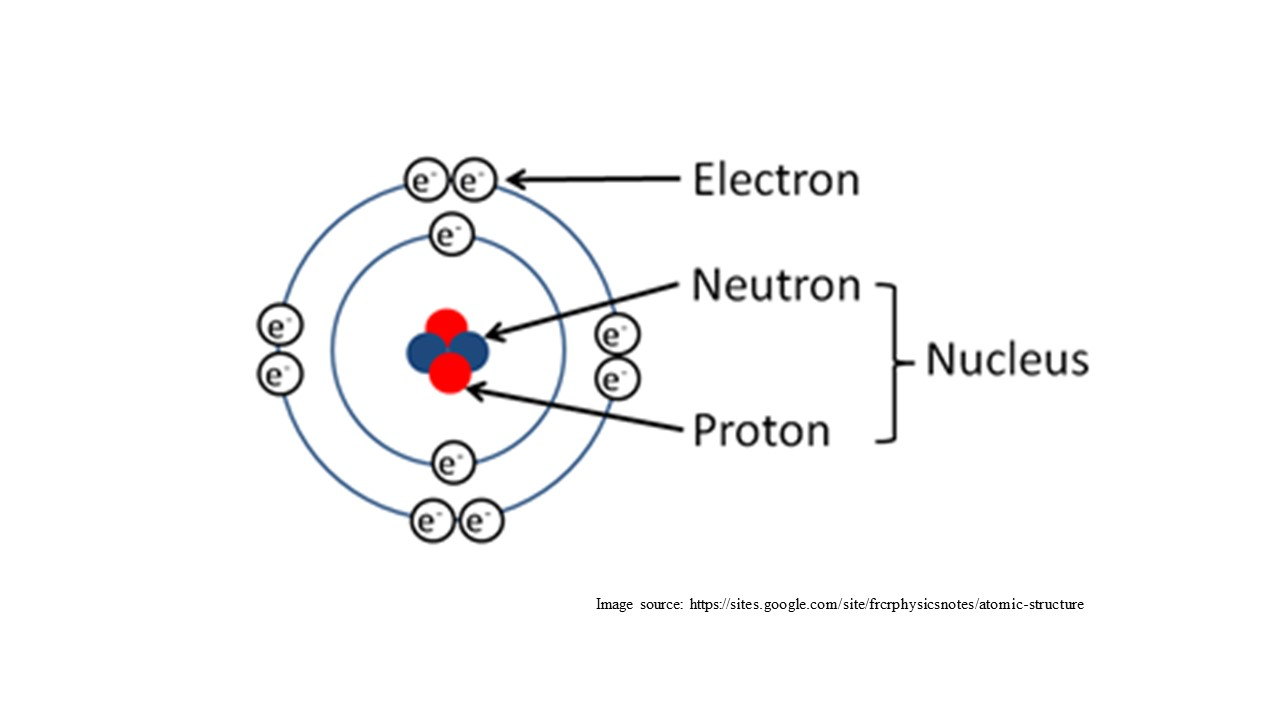



Do you think proton, neutron and electron are the most fundamental particles?

Can we go even deeper into these subatomic particles?

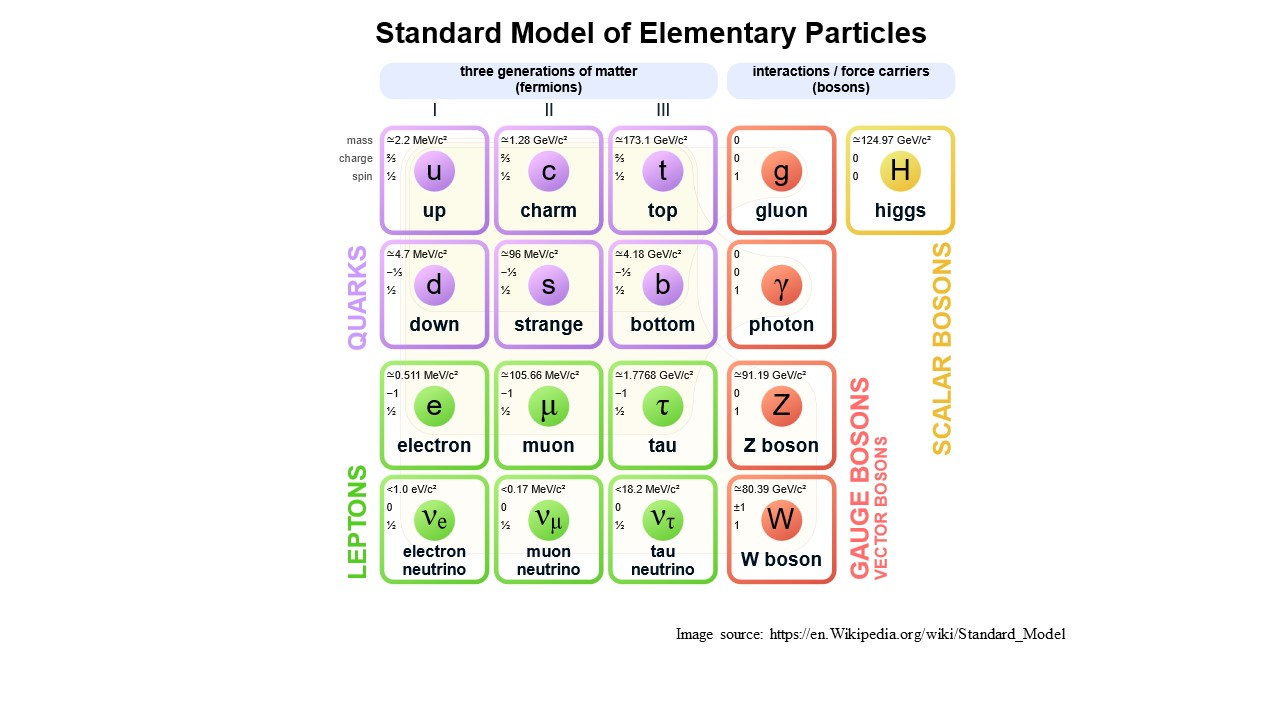

Just like the periodic table of elements in Chemistry, the **Standard Model (SM) of Particle Physics** is a mathematical model that describes the fundamental particles (matter particles and force particles) and their interactions.

Fundamental particles can be divided into two categories: the **matter particles** (quarks and leptons) and the **force particles** (bosons).

There are six flavours of quarks (up, down, charm, strange, top, bottom) and six flavours of leptons (electron, muon, tau, electron neutrino, muon neutrino, tau neutrino).

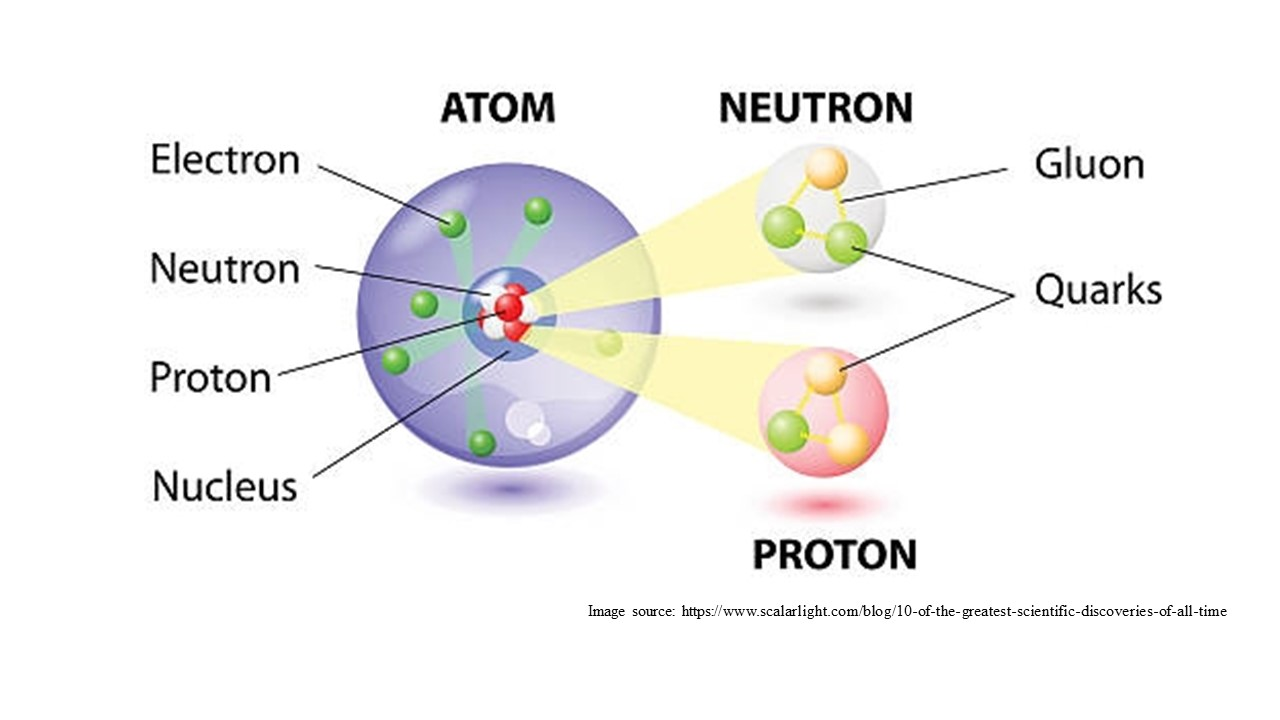

In fact, a proton is made up of two up quarks and one down quark (uud). The charge of an up quark and a down quark is +2/3 and -1/3 respectively, the charge of a proton is therefore 2/3 + 2/3 - 1/3 = +1.

Meanwhile, the force particles are responsible for the fundamental forces.

For examples,   
 *  A gluon is responsible for the strong force. It binds quarks together to form protons and neutrons.   
 * A photon (light!) is responsible for the electromagnetic force.

When we talk about matter, we know that matter has mass. You have mass, your cells have mass, even the protons found inside the nucleus of your cells have mass!

But how do all of these particles acquire their masses?

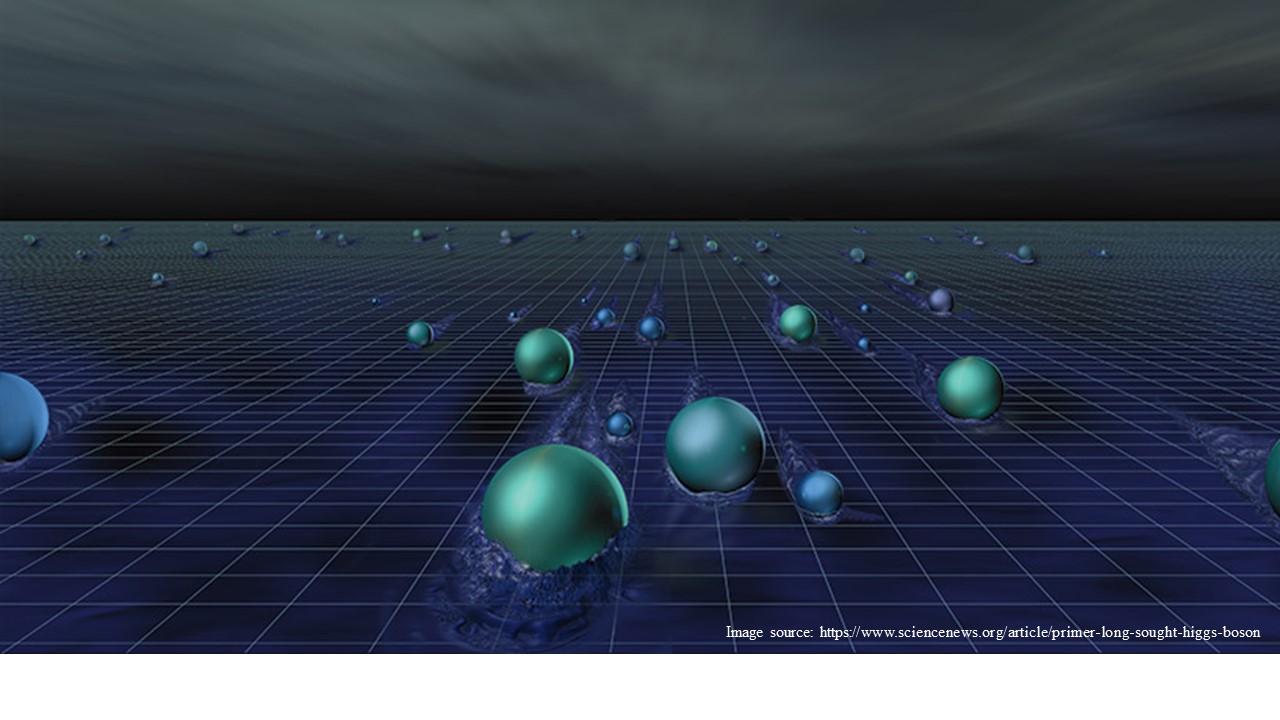

In 1960, some physicists proposed the idea of how particles obtain their masses through interacting with a fundamental field, which today we called it the **Higgs field**.

To study about the Higgs field, we need to find out its quantum particle, the **Higgs boson**!

The Higgs boson is referred to as a God particle because it was only discovered in 2012 after 40 years of High-Energy-Physics (HEP) research at the CERN's Large Hadron Collider (LHC). LHC is the world's largest particle accelerator and it is used to accelerate particles (protons). The Higgs boson is known to have much larger mass as compared to a proton.  In the 27km long accelerator, two protons are made to travel at nearly the speed of light in the opposite direction so that they gain great amount of energy (based on mass-energy equivalence principle) before they collide each other at one of the four particle detectors (for example, ATLAS) to produce the Higgs boson through interaction of quarks and gluons in the protons. However, the Higgs boson is an unstable particle and it decays almost immediately into another more stable low-energy particles! Physicists study about the parameters such as the momentum and energy of the particles produced in a proton-proton collision, and based on these data, it is possible for them to discover the Higgs.

Chill~ You can look at the diagram below _(and choose which flavour of pizza you prefer)_ to see an analogy of what is happenning during a proton-proton collision! <br> <br>
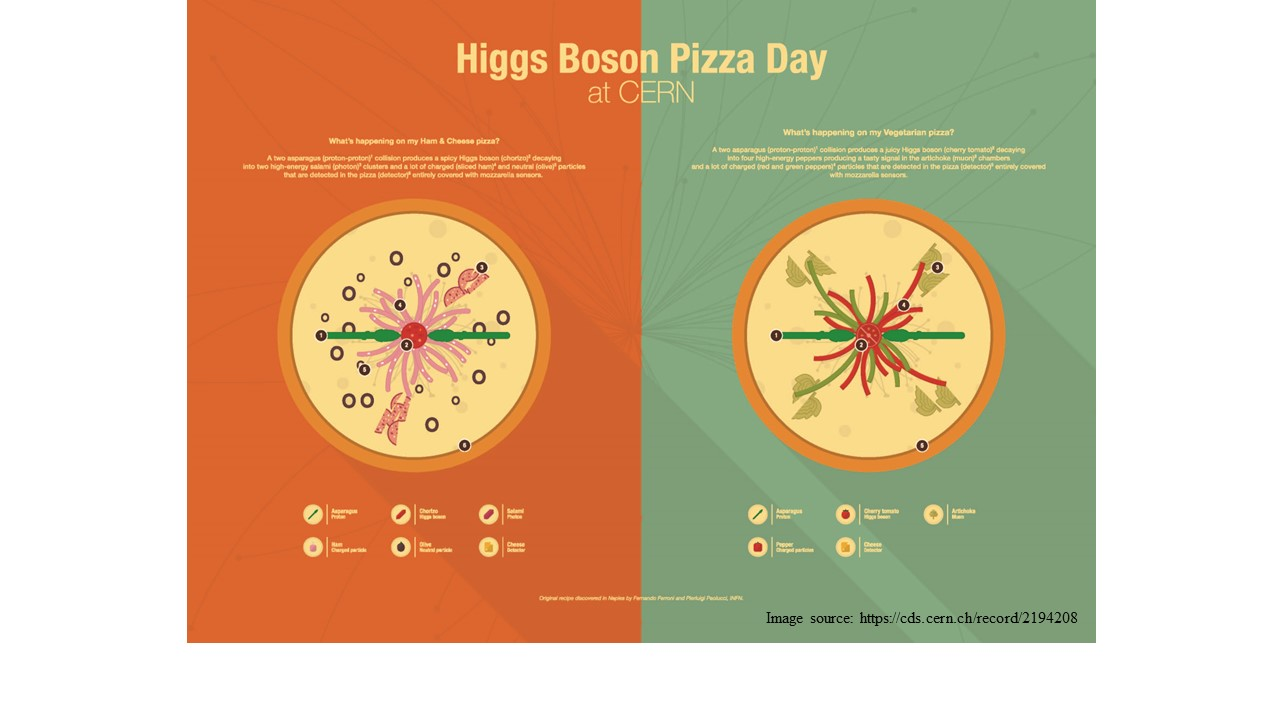

The Higgs boson can decay into various types of particles giving rise to various decay channels. In this module, we are going to rediscover the Higgs boson using ATLAS' open data through Python programming. We will focus on one of the channels, that is Higgs boson decaying into a pair of Z bosons and each Z boson eventually decaying into a pair of leptons (electrons or muons), <br> **H &rarr; ZZ &rarr; 4 &#8467;**.

If you are new to programming, you can refer to the module `Exercise_Python` .

## The Journey to Re-Discover the Higgs Boson Begins...

The structure of this analysis is as follow:
    
1. Importing modules
2. Sampling
3. Calculating invariant mass and cross-sections
4. Applying cuts
5. Processing Data
6. Plotting histograms

### Part 1: Importing modules

> Refer to Section 5: Modules

Remember? We import modules using the following syntax:

` import modules_name as abbreviation `

The $numpy$- module helps us to perform numerical computing in Python. <br>
The $awkward$- module helps us to store data with variable length lists.

Can you try to import both modules with abbreviations `np` and `ak` respectively?

In [1]:
#Click here to insert your codes.
#Press SHIFT + ENTER to run the codes.
import numpy as np
import awkward as ak

There are also some modules that do not have any abbreviations. To access them, we simply insert the `module_name`.

In [2]:
#Particle Physics Data are usually stored in .root format. We import uproot to help us to read .root files
import uproot

#Import infofile (a local file) that contains the sum of weights and cross-sections
import infofile

#Import vector for four-momentum calculations
import vector

#Import time to perform time-related function
import time



### Part 2: Sampling

We need data samples to analyse and process! We use the URL below to access to the open data provided by ATLAS.

In [3]:
#URL to access to our input file
tuple_path = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/"

#### 2.1 Defining parameters

> Refer to Section 1: Types and Variables

The datasets used in this analysis corresponds to an integrated luminosity of _10 fb$^{-1}$_ and the values of units as stored in the data files for _MeV_ and _GeV_ are 0.001 and 1.0 respectively.

Try to define the parameters $(luminosity, fraction, MeV, GeV)$ in the cell below.

In [4]:
#Integrated luminosity of 10 fb-1
lumi = 10 

#Fraction of data
fraction = 1.0

#Units
MeV = 0.001
GeV = 1.0

#### 2.2 Grouping samples

> Refer to Section 4: Dictionary

To put our data in a more organized manner (so that we can call them with their respective values easily), we put them into a `dictionary = {}`.

Now we have four dictionaries called

`'data', r'Background $Z,t\bar{t}$',  r'Background $ ZZ^* $' and r'Signal ($m_H$ = 125 GeV)'`

The first key of the four dictionaries is `'list'`. The second key (except for the first dictionary) is `'color'`.

The corresponding values for 'data' are `'data_A', 'data_B', 'data_C' and 'data_D'`. <br>
The corresponding values of the second dictionary are `'Zee', 'Zmumu', 'ttbar_lep', "#6b59d3"`. <br>
The corresponding values of the third dictionary are `'llll', "#00cdff"` . <br>
The corresponding values of the fourth dictionary are `'ggH125_ZZ4lep','VBFH125_ZZ4lep','WH125_ZZ4lep', 'ZH125_ZZ4lep',"#ff0000"`.

Can you try to put them into a big dictionary called `'samples'`?

In [5]:
#samples = {
samples = {
    'data': {
        'list' : ['data_A', 'data_B', 'data_C', 'data_D'],
    },
    
    r'Background $Z,t\bar{t}$' : { 
        'list' : ['Zee', 'Zmumu', 'ttbar_lep'],
        'color' : "#6b59d3"
    },
    
    r'Background $ZZ^*$' : {
        'list' : ['llll'],
        'color' : "#00cdff"
    },
    
    r'Signal ($m_H$ = 125 GeV)' : {
        'list' : ['ggH125_ZZ4lep','VBFH125_ZZ4lep','WH125_ZZ4lep', 'ZH125_ZZ4lep'],
        'color' : "#ff0000"
    },
    
}

#### 2.3 Defining a Function to Get Data from Files

> Refer to Section 3: Functions <br>
> Refer to Section 7: _for_ Loops

Instead of writing blocks of long codes in the $Processing$ part later, which will make the $Processing$ part looks complicated, we define a function `get_data_from_files` here so that we can directly get our `data` in the following part when we call the function.

There are two types of samples in the URL provided by ATLAS. If the samples with names start with `"Data/"`, they are the experimental **data**; else, if their names start with `"MC/mc_"`, they are the predictions from the **Monte Carlo Simulations**.

In [6]:
#define the function here
def get_data_from_files():
    #create an empty dictionary "data"
    data = {}
    #loop over samples
    for s in samples:
        #print each sample
        print('Processing'+s+'samples')
        #create an empty list "frames"
        frames = []
        #loop over each "list" from the sample
        for val in samples[s]['list']:
            #differentiate between experimental data and MC predictions
            if s == 'data': prefix = "Data/"
            else:
                prefix = "MC/mc_"+str(infofile.infos[val]["DSID"])+"."
            fileString = tuple_path+prefix+val+".4lep.root"
            temp = read_file(fileString,val)
            frames.append(temp)
        data[s] = ak.concatenate(frames)
    #return dictionary    
    return data

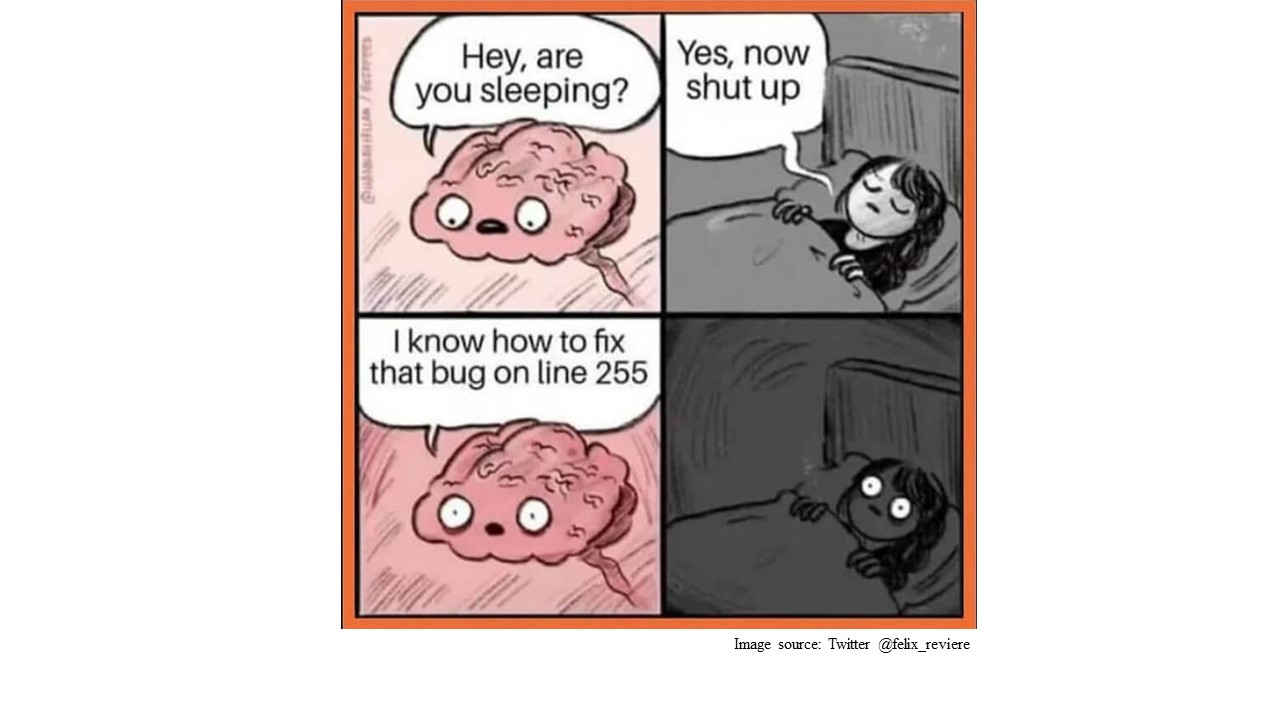

### Part 3: Calculating Cross-Section Weight


Talking about MC simulations, let's define a function `calc_weight` with two arguments `xsec_weight` and `events` to calculate the weight of the MC events. This can be done by multiplying the `xsec_weight` with all scale factors.

In [7]:
def calc_weight(xsec_weight, events):
    return(
        xsec_weight
        * events.mcWeight
        * events.scaleFactor_PILEUP
        * events.scaleFactor_ELE
        * events.scaleFactor_MUON
        * events.scaleFactor_LepTRIGGER
    )

We proceed to calculating the cross-section (_probability_) weight. In your function `get_xsec_weight`, you need to open the infofile and return `xsec_weight` with calculation of the product of `lumi` and `"xsec"` from infofile divided by the product of `"sumw"` and `"red_eff"` from infofile.  

In [8]:
def get_xsec_weight(sample):
    info = infofile.infos[sample]
    xsec_weight = (lumi*1000*info["xsec"])/(info["sumw"]*info["red_eff"])
    return xsec_weight

### Part 4: The Climax is here!

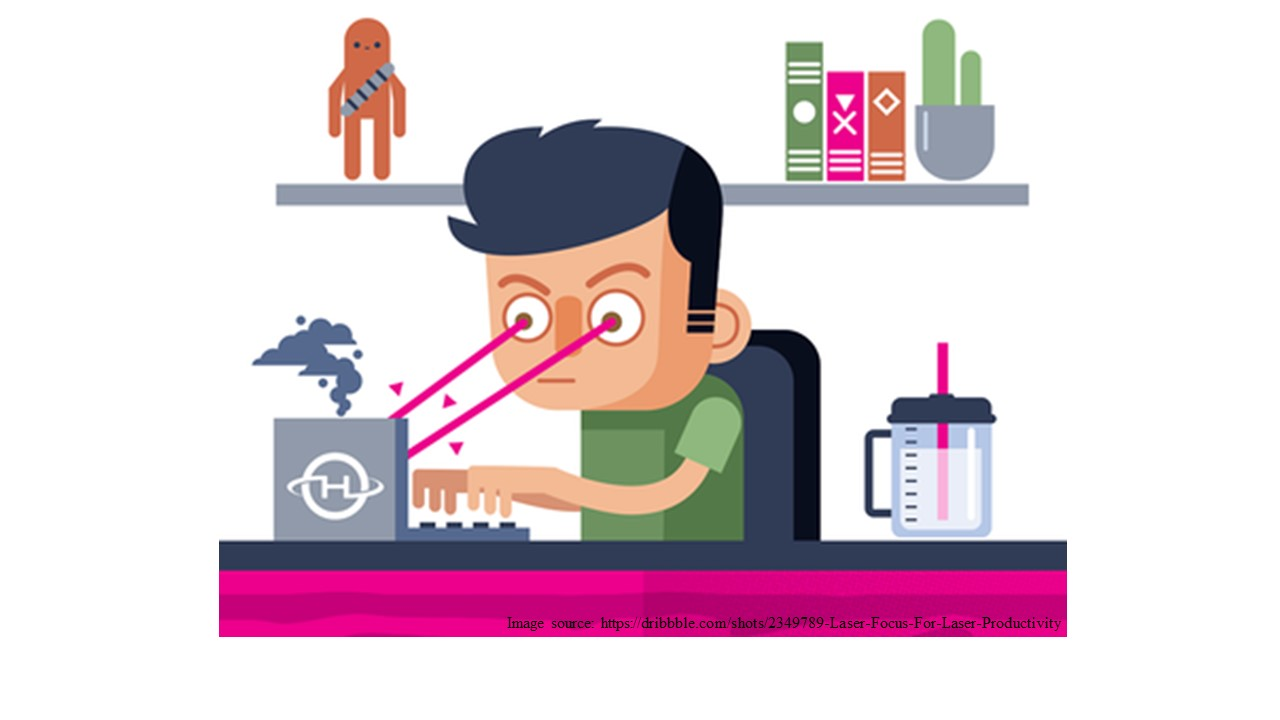

When a body travels at _nearly_ the speed of light, it experiences **relativistic effects**, where the length of the body and the time _vary_ with respect to different frames of reference. For example, when a one-metre train travels at nearly the speed of light, the train appears shorter in a stationary observer's frame of reference, but it is still one-metre long at its own reference frame. According to the theory of special relativity, **mass is a form of energy**. When the velocity of a body increases, its mass also increases. _Huh? Sounds ridiculuous! Nah... we have not experienced moving at nearly the speed of light either, but **the particles do**!_

Taking the effects into calculations makes a particle physicist's life hard. However, we have a physical quantity, the **invariant mass** of a body does not change in any frame of reference. For any particle system, 

<center> $M^2c^4 = (\sum{E})^2 - (\sum{pc})^2$ </center>

where <br>
$M = Invariant\ mass\ of\ a\ body = Energy\ in\ rest\ frame$ <br>
$E = Mass\ energy$ <br>
$p = Linear\ momentum$ <br>
$c= Speed\ of\ light$

The variables which are required to determine the invariant mass of the four-lepton system (`lep_pt`, `lep_eta`, `lep_phi`, `lep_E`) are provided in the datasets.

To determine the **sum of mass energy**, <br>
<center> $\sum{E} = p_0 + p_1 + p_2 + p_3$ </center>
<br>

where the momentum, $p$ of each lepton in each event is, <br>
<center> $p_i = $($p_{T_i}$) / ($sin \theta_i$) </center>
<br>

and $\theta$ can be obtained from `lep_eta`, <br>
<center> $\eta_{i} = - \ln tan(\theta_{i}/2)$ </center>
<br>

Meanwhile, to determine the **sum of linear momentum**, <br>
<center> $\sum{p} = p_x + p_y + p_z$ </center>
<br>

where $p_x$, $p_y$, $p_z$ are momenta in the _x-_, _y-_, _z-_ directions respectively.
<center> 
    $p_{x_i} = p_i sin \theta_i cos \phi_i$ <br>
    $p_{y_i} = p_i sin \theta_i sin \phi_i$ <br>
    $p_{z_i} = p_i cos \theta_i$
    </center>
<br>

Wow! Since we have four leptons per event, that is a lot to count!

Hehe, to save time, the particle physicists have solved for you! You can simply call the attribute `.M` in your codes to get the **invariant mass** of the system.


[Hint: Define a function that returns the **invariant mass** (_Lorentz vector_) of the four-lepton system.]

In [9]:
def calc_mllll(lep_pt, lep_eta, lep_phi, lep_E):
    p4 = vector.awk(ak.zip(dict(pt=lep_pt, eta=lep_eta, phi=lep_phi, E=lep_E)))
    return (p4[:,0] + p4[:,1] + p4[:,2] + p4[:,3]).M * MeV

### Part 5: Applying Cuts

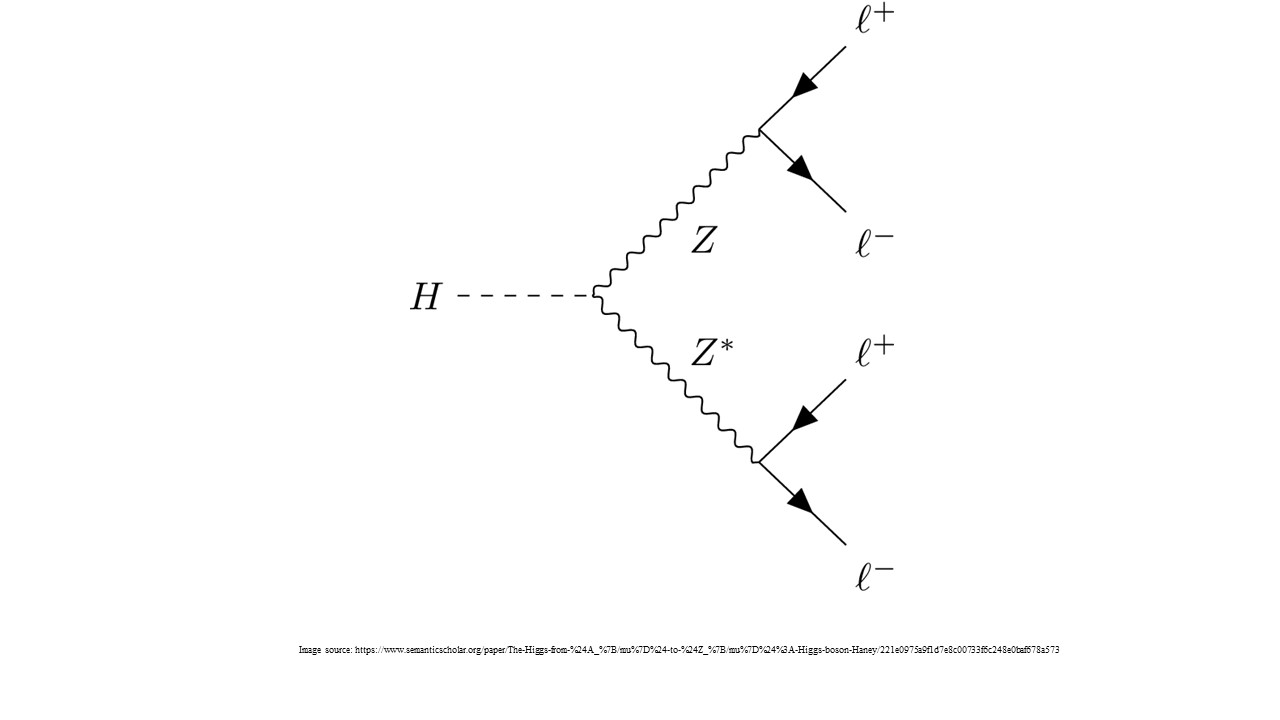

The Feynman diagram above illustrates a Higgs boson decays into two $Z$ bosons and finally into two pairs of leptons, each of the same flavour (either $ee$ or $\mu $$\mu $ but not $e$$\mu $) with opposite charge (since $Z$ is neutral).

The ATLAS detector stores data of events that contain **at least one electron or muon**. In this case, it requires to take a lot of time to process these huge amount of data. However, our interest is on the production of **four leptons** ($eeee$, $\mu\mu\mu\mu$ or $ee$$\mu\mu$) in the final state. Thus, we need to apply cuts on unwanted data to make processing quicker. 

Here, we would like to define a function `cut_lep_charge` with argument `lep_charge` to cut out the quadruplet combination of leptons if the sum of their charges is not equal to zero.

In [10]:
#Type your codes here.
def cut_lep_charge(lep_charge):
    return lep_charge[:,0] + lep_charge[:,1] + lep_charge[:,2] + lep_charge[:,3] != 0

Same applies to the types of lepton. Use the function `cut_lep_type` with argument `lep_type`.

In [11]:
#Type your codes here.
#The lep_type for an electron is 11.
#The lep_type for a muon is 13.
def cut_lep_type(lep_type):
    sum_lep_type = lep_type[:,0] + lep_type[:,1] + lep_type[:,2] + lep_type[:,3]
    return (sum_lep_type != 44) & (sum_lep_type != 48) & (sum_lep_type != 52)

In [12]:
def read_file(path,sample):
    start = time.time()
    print("\tProcessing: "+sample)
    data_all = []
    
    with uproot.open(path + ":mini") as tree:
        numevents = tree.num_entries
        if 'data' not in sample: xsec_weight = get_xsec_weight(sample)
        for data in tree.iterate(['lep_pt','lep_eta','lep_phi',
                                  'lep_E','lep_charge','lep_type',
                                  'mcWeight','scaleFactor_PILEUP',
                                  'scaleFactor_ELE','scaleFactor_MUON',
                                  'scaleFactor_LepTRIGGER'],
                                 library="ak",
                                 entry_stop=numevents*fraction):
            nIn = len(data)
            
            if 'data' not in sample:
                data['totalWeight'] = calc_weight(xsec_weight, data)
            
            data = data[~cut_lep_charge(data.lep_charge)]
            
            data = data[~cut_lep_type(data.lep_type)]
            
            data['mllll'] = calc_mllll(data.lep_pt, data.lep_eta, data.lep_phi, data.lep_E)
            
            nOut = len(data)
            data_all.append(data)
            elapsed = time.time() - start
            print("\t\t nIn: "+str(nIn)+",\t nOut: \t"+str(nOut)+"\t in "+str(round(elapsed,1))+"s")
            
        return ak.concatenate(data_all)

### Part 6: Processing Data

In [13]:
start = time.time()
data = get_data_from_files()
elapsed = time.time() - start
#print("Time taken: "+str(round(elapsed,1))+"s")

Processingdatasamples
	Processing: data_A
		 nIn: 1,	 nOut: 	0	 in 5.0s
		 nIn: 1,	 nOut: 	1	 in 5.5s
		 nIn: 1,	 nOut: 	1	 in 5.6s
		 nIn: 1,	 nOut: 	0	 in 5.7s
		 nIn: 1,	 nOut: 	1	 in 5.8s
		 nIn: 1,	 nOut: 	1	 in 5.8s
		 nIn: 1,	 nOut: 	0	 in 5.9s
		 nIn: 1,	 nOut: 	1	 in 6.1s
		 nIn: 1,	 nOut: 	1	 in 6.2s
		 nIn: 1,	 nOut: 	1	 in 6.2s
		 nIn: 1,	 nOut: 	0	 in 6.3s
		 nIn: 1,	 nOut: 	0	 in 6.4s
		 nIn: 1,	 nOut: 	0	 in 6.5s
		 nIn: 1,	 nOut: 	0	 in 6.6s
		 nIn: 1,	 nOut: 	1	 in 6.7s
		 nIn: 1,	 nOut: 	1	 in 6.7s
		 nIn: 1,	 nOut: 	1	 in 6.8s
		 nIn: 1,	 nOut: 	1	 in 6.9s
		 nIn: 1,	 nOut: 	1	 in 7.0s
		 nIn: 1,	 nOut: 	1	 in 7.1s
		 nIn: 1,	 nOut: 	1	 in 7.1s
		 nIn: 1,	 nOut: 	1	 in 7.2s
		 nIn: 1,	 nOut: 	1	 in 7.3s
		 nIn: 1,	 nOut: 	1	 in 7.4s
		 nIn: 1,	 nOut: 	1	 in 7.5s
		 nIn: 1,	 nOut: 	1	 in 7.5s
		 nIn: 1,	 nOut: 	0	 in 7.6s
		 nIn: 1,	 nOut: 	1	 in 7.7s
		 nIn: 1,	 nOut: 	0	 in 7.8s
		 nIn: 1,	 nOut: 	1	 in 7.9s
		 nIn: 1,	 nOut: 	1	 in 8.0s
		 nIn: 1,	 nOut: 	0	 in 8.0

### Part 6: Plotting Histograms

> Refer to Section 6: Plotting

Wow! Were you amazed by the number of events being processed just now?

Our next step is to present our results in a graphical manner (that is to plot a histogram!) so that it gives us a clear image of what we are *actually* doing.


Before plotting a graph, which module should you import?

In [14]:
#Hint: Look for the 'strange' and repeated abbreviations found in next few sections!

import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

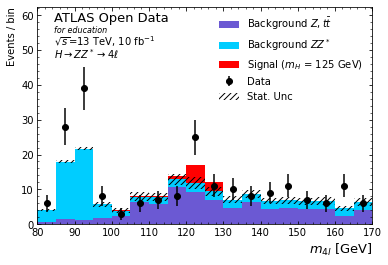

In [15]:
#Data is the core of any graph. 
#The amount of data that we processed just now is so enormous.
#Since we know that the mass of the Higgs boson is around 125 GeV,  
#we can focus plotting data in the range of [80, 170] GeV.
xmin = 80 * GeV
xmax = 170 * GeV
step_size = 5 * GeV
    
bin_edges = np.arange(start=xmin,stop=xmax+step_size,step=step_size)
    
bin_centres = np.arange(start=xmin+step_size/2,stop=xmax+step_size/2,step=step_size)

#========================================================================================= variables

#experimental data
data_x,_ = np.histogram(ak.to_numpy(data['data']['mllll']),bins=bin_edges)
data_x_errors = np.sqrt(data_x)

#signal
signal_x = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)']['mllll'])
signal_weights = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)'].totalWeight)
signal_color = samples[r'Signal ($m_H$ = 125 GeV)']['color']

#background
mc_x = []
mc_weights = []
mc_colors = []
mc_labels = []
    
for s in samples:
    if s not in ['data', r'Signal ($m_H$ = 125 GeV)']:
        mc_x.append(ak.to_numpy(data[s]['mllll']))
        mc_weights.append(ak.to_numpy(data[s].totalWeight))
        mc_colors.append(samples[s]['color'])
        mc_labels.append(s)

#========================================================================================= plots

main_axes = plt.gca()

#data
main_axes.errorbar(x=bin_centres, y=data_x, yerr=data_x_errors,fmt='ko',label='Data')

#background
mc_heights = main_axes.hist(mc_x, bins=bin_edges,weights=mc_weights, stacked=True,color=mc_colors, label=mc_labels)

#signal
mc_x_tot = mc_heights[0][-1]
    
main_axes.hist(signal_x, bins=bin_edges, bottom=mc_x_tot,weights=signal_weights, color=signal_color,label=r'Signal ($m_H$ = 125 GeV)')

#stat unc
mc_x_err = np.sqrt(np.histogram(np.hstack(mc_x), bins=bin_edges, weights=np.hstack(mc_weights)**2)[0])
main_axes.bar(bin_centres, 2*mc_x_err,alpha=0.5,bottom=mc_x_tot-mc_x_err, color='none',hatch="////",width=step_size, label='Stat. Unc')

#========================================================================================= features

#You have all the data above, but how about your axes?
#define x- and y- limits
main_axes.set_xlim(left=xmin, right=xmax)
main_axes.set_ylim(bottom=0, top=np.amax(data_x)*1.6)

main_axes.xaxis.set_minor_locator(AutoMinorLocator())
    
main_axes.tick_params(which='both',direction='in',top=True,right=True)
    
main_axes.set_xlabel('$m_{4l}$ [GeV]',fontsize=13, x=1, horizontalalignment='right')
    
main_axes.set_ylabel('Events / bin',y=1, horizontalalignment='right')
    

    
main_axes.yaxis.set_minor_locator(AutoMinorLocator())
    
plt.text(0.05,0.93,'ATLAS Open Data',transform=main_axes.transAxes,fontsize=13)
    
plt.text(0.05,0.88,'for education',transform=main_axes.transAxes,style='italic',fontsize=8)
    
plt.text(0.05,0.82,'$\sqrt{s}$=13 TeV, 10 fb$^{-1}$',transform=main_axes.transAxes)
    
plt.text(0.05,0.76,r'$H \rightarrow ZZ^* \rightarrow 4\ell$',transform=main_axes.transAxes)

main_axes.legend(frameon=False)

Graphs without x- and y- axes? Hmm...

Define your axes!

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


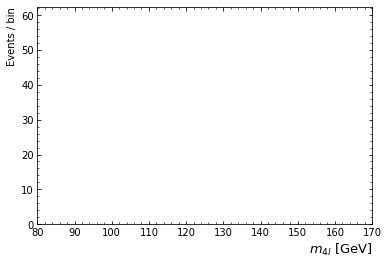

In [16]:
main_axes = plt.gca()

#The limit and labelling of x-axis
main_axes.set_xlim(left=xmin, right=xmax)
main_axes.set_xlabel(r'${m_{4l}}$ [GeV]', fontsize=13, x=1, horizontalalignment='right')

#And y-axis...
main_axes.set_ylim(bottom=0, top=np.amax(data_x)*1.6)
main_axes.set_ylabel('Events / bin', y=1, horizontalalignment='right')

#We don't want to have only the major ticks!
main_axes.xaxis.set_minor_locator(AutoMinorLocator())
main_axes.yaxis.set_minor_locator(AutoMinorLocator())
main_axes.tick_params(which='both', direction='in', top=True, right=True)

#Display legends on your graph.
main_axes.legend(frameon=False)

<BarContainer object of 18 artists>

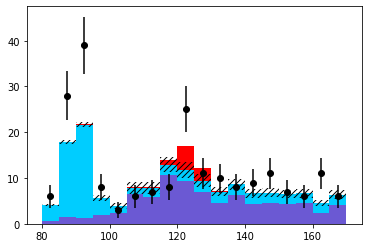

In [17]:

bin_edges = np.arange(start=xmin,stop=xmax+step_size,step=step_size)
    
bin_centres = np.arange(start=xmin+step_size/2,stop=xmax+step_size/2,step=step_size)

#main_axes = plt.gca()

#data
data_x,_ = np.histogram(ak.to_numpy(data['data']['mllll']),bins=bin_edges)

data_x_errors = np.sqrt(data_x)

plt.errorbar(x=bin_centres, y=data_x, yerr=data_x_errors,fmt='ko',label='Data')

#background
mc_x = []
mc_weights = []
mc_colors = []
mc_labels = []
    
for s in samples:
    if s not in ['data', r'Signal ($m_H$ = 125 GeV)']:
        mc_x.append(ak.to_numpy(data[s]['mllll']))
        mc_weights.append(ak.to_numpy(data[s].totalWeight))
        mc_colors.append(samples[s]['color'])
        mc_labels.append(s)

mc_heights = plt.hist(mc_x, bins=bin_edges,weights=mc_weights, stacked=True,color=mc_colors, label=mc_labels)

#signal  
signal_x = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)']['mllll'])
signal_weights = ak.to_numpy(data[r'Signal ($m_H$ = 125 GeV)'].totalWeight)
signal_color = samples[r'Signal ($m_H$ = 125 GeV)']['color']
    
mc_x_tot = mc_heights[0][-1]

plt.hist(signal_x, bins=bin_edges, bottom=mc_x_tot,weights=signal_weights, color=signal_color,label=r'Signal ($m_H$ = 125 GeV)')
#Stat Unc
mc_x_err = np.sqrt(np.histogram(np.hstack(mc_x), bins=bin_edges, weights=np.hstack(mc_weights)**2)[0])
    
plt.bar(bin_centres, 2*mc_x_err,alpha=0.5,bottom=mc_x_tot-mc_x_err, color='none',hatch="////",width=step_size, label='Stat. Unc')

The histogram looks good? Compare your histogram with the figure below.

I guess you have seen the difference. Try adding some texts to it!

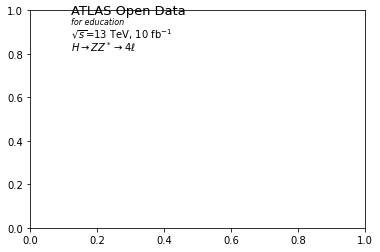

In [18]:
#Hint: matplotlib.pyplot.text(x_coordinate, y_coordinate, string, transform, style, fontsize)

plt.text(0.05, 0.93, 'ATLAS Open Data', transform=main_axes.transAxes, fontsize=13)
    
plt.text(0.05, 0.88, 'for education', transform=main_axes.transAxes, style='italic', fontsize=8)
    
plt.text(0.05, 0.82, '$\sqrt{s}$=13 TeV, 10 fb$^{-1}$', transform=main_axes.transAxes)
    
plt.text(0.05, 0.76, r'$H \rightarrow ZZ^* \rightarrow 4\ell$', transform=main_axes.transAxes)

plt.show()

#Don't forget to save your masterpiece.
